<a href="https://colab.research.google.com/github/Amirtha277/DigiBhem/blob/main/Car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd

# Load the dataset

df = pd.read_csv("/content/drive/MyDrive/Automobile_data.csv")

# Preview the data
df.head()




,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [30]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values or drop columns if needed
df['normalized-losses'].replace("?", None, inplace=True)
df.dropna(inplace=True)

# Convert data types if necessary
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df.dropna(subset=['price'], inplace=True)

# Check the cleaned data
df.info()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          164 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               164 non-null    object 
 3   fuel-type          164 non-null    object 
 

In [31]:
# Convert categorical variables to numerical using One-Hot Encoding
df = pd.get_dummies(df, drop_first=True)

# Check the dataframe after encoding
df.head()


,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,...,peak-rpm_5100,peak-rpm_5200,peak-rpm_5250,peak-rpm_5300,peak-rpm_5400,peak-rpm_5500,peak-rpm_5600,peak-rpm_5800,peak-rpm_6000,peak-rpm_6600
3,2,99.8,176.6,66.2,54.3,2337,109,10.0,24,30,...,False,False,False,False,False,True,False,False,False,False
4,2,99.4,176.6,66.4,54.3,2824,136,8.0,18,22,...,False,False,False,False,False,True,False,False,False,False
6,1,105.8,192.7,71.4,55.7,2844,136,8.5,19,25,...,False,False,False,False,False,True,False,False,False,False
8,1,105.8,192.7,71.4,55.9,3086,131,8.3,17,20,...,False,False,False,False,False,True,False,False,False,False
10,2,101.2,176.8,64.8,54.3,2395,108,8.8,23,29,...,False,False,False,False,False,False,False,True,False,False


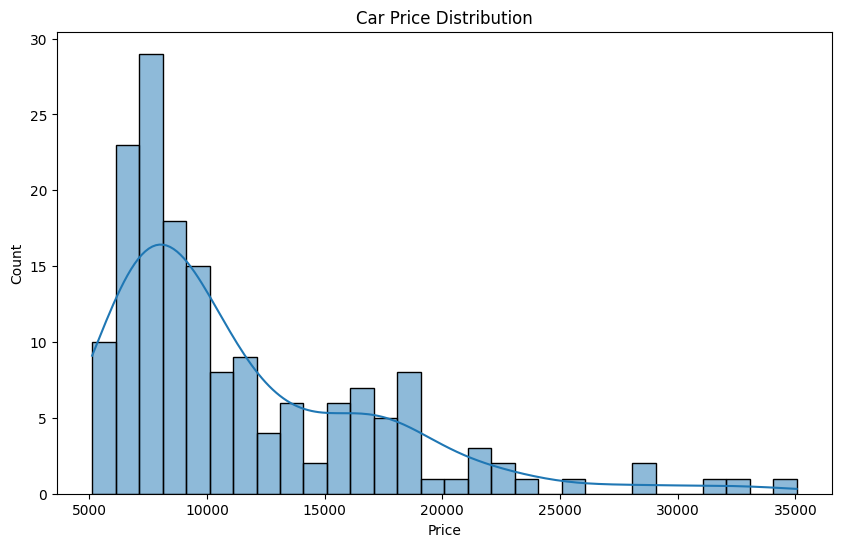

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of car prices
plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Car Price Distribution')
plt.xlabel('Price')
plt.show()


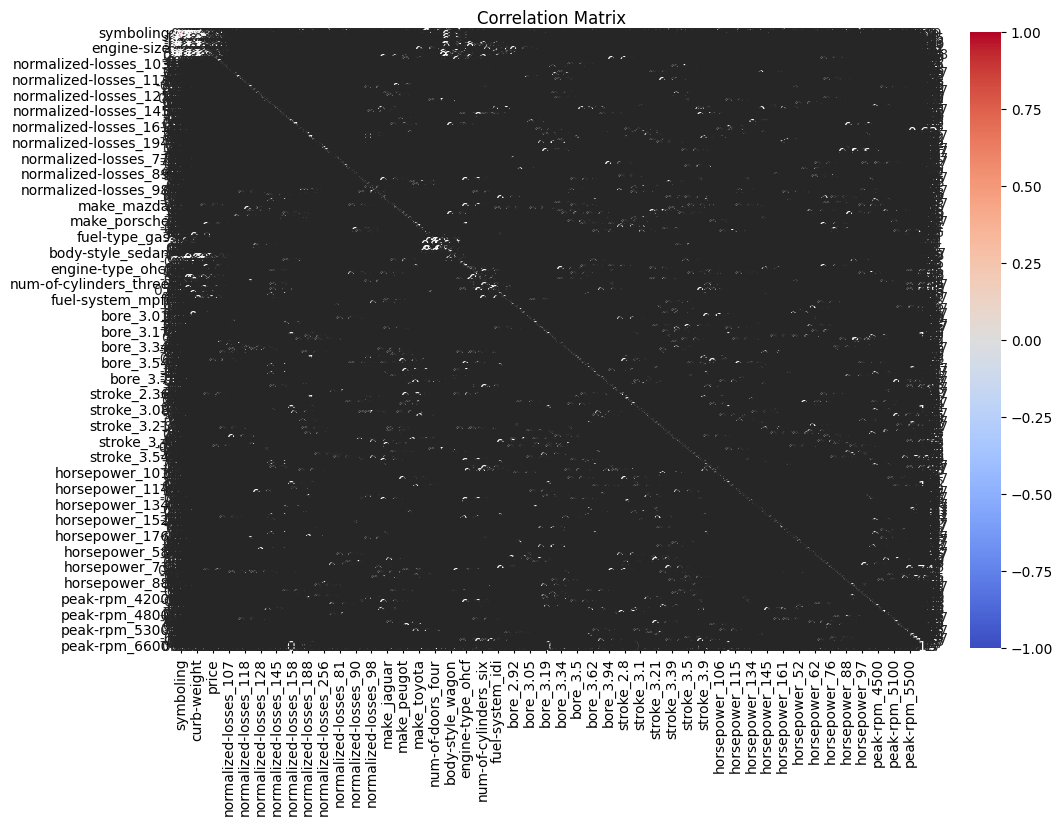

price                    1.000000
curb-weight              0.891750
width                    0.841883
engine-size              0.807566
length                   0.756060
                           ...   
fuel-system_2bbl        -0.549163
num-of-cylinders_four   -0.621000
drive-wheels_fwd        -0.621028
city-mpg                -0.678644
highway-mpg             -0.709135
Name: price, Length: 235, dtype: float64


In [35]:
# Correlation matrix
plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Focus on features that are strongly correlated with 'price'
print(correlation_matrix['price'].sort_values(ascending=False))


In [36]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print(X_train.shape, X_test.shape)


(131, 234) (33, 234)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lin_reg = LinearRegression()

# Train the model
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred = lin_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 36408100.03
R-squared: -0.31


In [38]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_reg = RandomForestRegressor(random_state=42)

# Train the model
rf_reg.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_reg.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error: {mse_rf:.2f}')
print(f'Random Forest - R-squared: {r2_rf:.2f}')


Random Forest - Mean Squared Error: 3914434.45
Random Forest - R-squared: 0.86


In [39]:
print(f"Linear Regression R-squared: {r2:.2f}")
print(f"Random Forest R-squared: {r2_rf:.2f}")



Linear Regression R-squared: -0.31
Random Forest R-squared: 0.86
